In [62]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [63]:
(X_train, y_train) , (X_test, y_test) = datasets.cifar10.load_data()


In [64]:

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [65]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


Here the Y train and test is 2D array which we need to convert into 1D array

In [66]:
y_test = y_test.reshape(-1,)
y_train = y_train.reshape(-1,)

print(y_test.shape)
print(y_train[5:])

(10000,)
[1 2 7 ... 9 1 1]


In the cifar10 there are 10 classes 

In [67]:
classes = ["airplane", "automobile", "brid", "cat", "deer", "dog", "frog", "horse" , "ship", "truck"]

Show some images
for that we will create a function whic will show us the image we want 

In [68]:
def plot_simple(X,y , index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

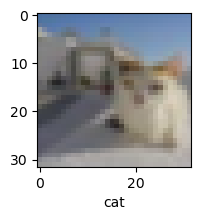

In [69]:
plot_simple(X_train,y_train, 80)

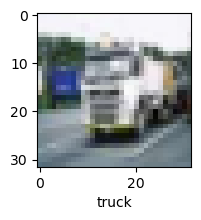

In [70]:
plot_simple(X_train , y_train , 1000)

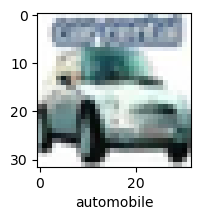

In [71]:
plot_simple(X_train , y_train , 40000)

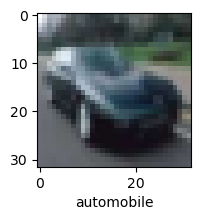

In [72]:
plot_simple(X_train , y_train , 11000)

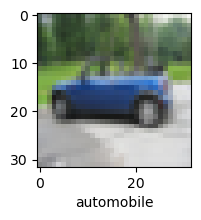

In [73]:
plot_simple(X_train , y_train , 10110)

### Now let normalize the data

we have 255 channels in colors os to normilize each color value we need to devided the values on 255

In [74]:
X_train = X_train / 255
X_test = X_test / 255

In [31]:
y_train

array([0.02352941, 0.03529412, 0.03529412, ..., 0.03529412, 0.00392157,
       0.00392157])

#### Creating a simple model 

In [75]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(2000, activation="relu"),
    layers.Dense(1000, activation="relu"),
    layers.Dense(10, activation="softmax"),
])

ann.compile(optimizer="SGD",
            loss="sparse_categorical_crossentropy",
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 142s 90ms/step - loss: 1.8127 - accuracy: 0.3528
Epoch 2/5
1563/1563 [==============================] - 135s 87ms/step - loss: 1.6236 - accuracy: 0.4272
Epoch 3/5
1563/1563 [==============================] - 166s 106ms/step - loss: 1.5412 - accuracy: 0.4574
Epoch 4/5
1563/1563 [==============================] - 112s 71ms/step - loss: 1.4836 - accuracy: 0.4780
Epoch 5/5
1563/1563 [==============================] - 114s 73ms/step - loss: 1.4302 - accuracy: 0.4969


In [76]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

y_predict = ann.predict(X_test)

y_predict_class = [np.argmax(element) for element in y_predict]

y_predict_class = np.argmax(y_predict, axis=1)

# Ensure y_test is flattened and of integer type
y_test = y_test.flatten().astype(int)

# Ensure y_predict_class is of integer type
y_predict_class = np.array(y_predict_class).astype(int)

print("*********************##### Classification Report ######********************* \n")
print(classification_report(y_test, y_predict_class))

313/313 [==============================] - 5s 17ms/step
*********************##### Classification Report ######********************* 

              precision    recall  f1-score   support

           0       0.50      0.55      0.53      1000
           1       0.65      0.57      0.61      1000
           2       0.48      0.07      0.12      1000
           3       0.30      0.48      0.37      1000
           4       0.50      0.32      0.39      1000
           5       0.38      0.37      0.38      1000
           6       0.49      0.55      0.52      1000
           7       0.57      0.52      0.54      1000
           8       0.50      0.72      0.59      1000
           9       0.52      0.61      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.46     10000
weighted avg       0.49      0.48      0.46     10000



In [77]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(14, 7) )
sns.heatmap(y_predict, annot = True)
plt.ylable = ("Truth")
plt.xlable("Predictions")
plt.title("Confusion Matrixs")
plt.show()


In [78]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])


In [1]:
cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=['accuracy'])


NameError: name 'cnn' is not defined

In [80]:
cnn.fit(X_train, y_train , epochs= 10)


Epoch 1/10
1563/1563 [==============================] - 47s 29ms/step - loss: 1.4698 - accuracy: 0.4754
Epoch 2/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.1009 - accuracy: 0.6157
Epoch 3/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.9632 - accuracy: 0.6630
Epoch 4/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8662 - accuracy: 0.6968
Epoch 5/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7986 - accuracy: 0.7204
Epoch 6/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7381 - accuracy: 0.7424
Epoch 7/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.6872 - accuracy: 0.7620
Epoch 8/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.6402 - accuracy: 0.7771
Epoch 9/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.5977 - accuracy: 0.7907
Epoch 10/10
1563/1563 [==============================] - 61s 39m

In [81]:
cnn.evaluate(X_test, y_test)


313/313 [==============================] - 6s 17ms/step - loss: 0.9471 - accuracy: 0.6970


[0.9470505118370056, 0.6970000267028809]

In [83]:
y_predict = cnn.predict(X_test)

313/313 [==============================] - 4s 11ms/step


In [82]:
y_predict[:5]

array([[3.35933231e-02, 6.02121539e-02, 3.82071026e-02, 4.90434200e-01,
        9.67876427e-03, 1.84962451e-01, 8.70687291e-02, 2.25106161e-03,
        8.86536986e-02, 4.93857078e-03],
       [8.14807229e-03, 2.28087440e-01, 3.41270701e-04, 2.05579610e-03,
        3.34200769e-04, 5.25241601e-04, 1.46024904e-04, 4.72919462e-04,
        3.54363531e-01, 4.05525535e-01],
       [9.63737741e-02, 1.46721676e-01, 1.45997398e-03, 3.54089541e-03,
        1.02647184e-03, 2.14826292e-03, 9.42694242e-05, 2.02317233e-03,
        6.44200861e-01, 1.02410585e-01],
       [1.50679067e-01, 8.32564831e-02, 2.05181446e-02, 2.47163139e-02,
        1.69603936e-02, 2.00211555e-02, 8.82004097e-04, 3.68718579e-02,
        6.09783113e-01, 3.63114923e-02],
       [1.48915313e-02, 3.67138674e-03, 6.82820901e-02, 9.81297046e-02,
        5.19043326e-01, 7.44976103e-02, 1.62828177e-01, 3.03392615e-02,
        2.66864710e-02, 1.63046271e-03]], dtype=float32)

In [84]:
y_classes = [np.argmax(element) for element in y_predict]
y_classes[:5]

[3, 8, 8, 0, 4]

In [85]:
y_test[:5]

array([3, 8, 8, 0, 6])

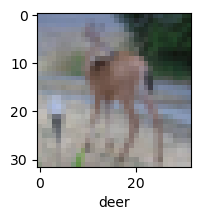

In [86]:
plot_simple(X_test,y_test, 100)

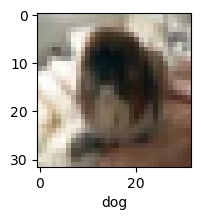

In [87]:
plot_simple(X_test,y_test, 200)

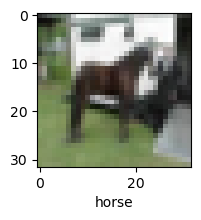

In [90]:
plot_simple(X_test,y_test, 20)

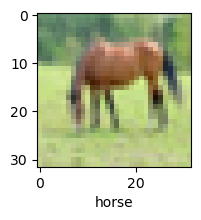

In [89]:
plot_simple(X_test,y_test, 60)

In [3]:
import numpy as np

# Function to compute the cost (Mean Squared Error)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

# Gradient Descent Algorithm
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.dot(X.T, predictions - y)
        theta -= (learning_rate / m) * errors
        cost_history[i] = compute_cost(X, y, theta)
    
    return theta, cost_history

# Example usage
# Data (X and y)
X = np.array([[1, 1], [1, 2], [1, 3], [1, 4]])  # Adding a column of ones for the intercept term
y = np.array([2, 3, 4, 5])

# Initial parameters (theta)
theta = np.array([0, 0])

# Hyperparameters
learning_rate = 0.01
iterations = 1000

# Running gradient descent
theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)

# Output the results
print("Final parameters (theta):", theta)
print("Final cost:", cost_history[-1])


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'